In [1]:
import numpy as np 
import numpy.linalg as LA 
import math as mt

# Problem 1 

## Full SVD

In [2]:
A = np.array([[0,1,0],
             [1,0,0]])
U,s,VT = LA.svd(A)
U,s,VT

(array([[1., 0.],
        [0., 1.]]),
 array([1., 1.]),
 array([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.]]))

In [25]:
np.linalg.matrix_rank(A)

2

## Pseudo Inverse

In [3]:
V = VT.T 
D = np.diag(s)
Dinv = LA.inv(D)
Dplus = np.concatenate((Dinv,np.array([[0,0]])),axis = 0)
# print(Dplus == LA.inv(A).shape)
A_plus = np.dot(V,np.dot(Dplus,U.T))
print(A_plus)
print(A.dot(A_plus) == np.eye(2) )


[[0. 1.]
 [1. 0.]
 [0. 0.]]
[[ True  True]
 [ True  True]]


# Problem 2 

In [4]:
AF =np.sqrt(np.sum(np.dot(A.T,A)))

AF == np.sqrt(np.sum(A**2))

True

In [5]:
A = np.random.randint(1,5,size=(2,3))
A

array([[4, 2, 4],
       [4, 1, 2]])

In [6]:
U,s,VT = LA.svd(A)

In [7]:
lam,u = LA.eig(A.T.dot(A))
lam

array([5.55601183e+01, 1.43988174e+00, 3.62525686e-31])

In [8]:
VT

array([[-7.51445819e-01, -2.95069206e-01, -5.90138412e-01],
       [ 6.59794802e-01, -3.36056786e-01, -6.72113573e-01],
       [ 1.12975792e-16, -8.94427191e-01,  4.47213595e-01]])

In [9]:
AF_1=np.trace(A.dot(A.T))
AF =np.sum(A**2)


In [10]:
AF_1== AF

True

# Problem 4

In [11]:
import numpy as np 
from matplotlib import pyplot as plt
import math as mt
from numpy import linalg as LA
import csv

### 4.1 Load DATA

In [12]:
DATA = []
with open("HW1Q4.csv","r") as f: 
    reader = csv.reader(f,delimiter=",")
    for line in reader:
        DATA.append([float(l) for l in line])
f.close()
DATA = np.array(DATA)
print(DATA.shape)

(220, 500)


### 4.2 Economy SVD

In [13]:
U,S,VT = LA.svd(DATA,full_matrices=False)
print(f"Shape of U is {U.shape}")
print(f"Shape of S is {S.shape}")
print(f"Shape of VT is {VT.shape}")

Shape of U is (220, 220)
Shape of S is (220,)
Shape of VT is (220, 500)


### 4.3 Plot

### 4.3.1 Singular Values

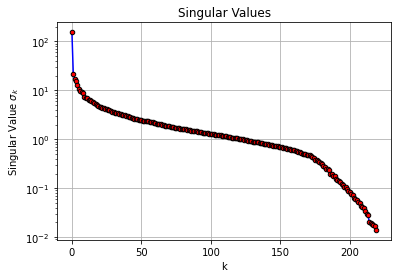

In [14]:
fig = plt.figure(0)
plt.semilogy(S,"-o",c='blue', mfc='red', mec='k',markersize = 4.5)
plt.grid()
plt.xlabel(r"k")
plt.ylabel(r"Singular Value ${{\sigma}_{k}}$")
plt.title("Singular Values")
fig.savefig("HW1Q4_S",dpi = 100)
plt.show()

### 4.3.2 Left Singular Vectors

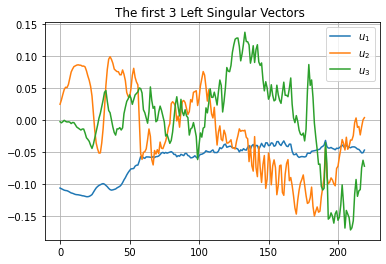

In [15]:
fig = plt.figure(1)
for i in range(3):
    plt.plot(U[:,i],label= r"$u_{}$".format(i+1))
plt.grid()
plt.legend()
plt.title("The first 3 Left Singular Vectors ")
fig.savefig("HW1Q4_U3",dpi = 100)

### 4.3.3 Right Singular Vectors 

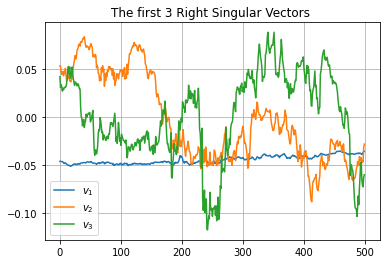

In [16]:
fig = plt.figure(2)
for i in range(3):
    plt.plot(VT.T[:,i],label= r"$v_{}$".format(i+1))
plt.grid()
plt.legend()
plt.title("The first 3 Right Singular Vectors ")
fig.savefig("HW1Q4_V3",dpi = 100)

In [17]:
# np.round(DATA.dot(VT[0,:])/U[:,0],2) == np.round(S[0],2)

#### 4.4 Verifying

In [18]:
V = VT.T
V3 = V[:,0:3]
projection = DATA.dot(V3)
Fnorm = LA.norm(projection,ord='fro')

In [19]:
np.round(Fnorm**2,4) == np.round(np.sum(S[0:3]**2),4)

True

In [20]:
V3 = VT[:3,:]
U3 = U[:,:3]
S3 = np.diag(S[:3])

print(U3.shape,V3.shape,S3.shape)
proj = U3 @ S3 @ V3 
Fnorm = LA.norm(proj,ord='fro')
print(Fnorm**2)
print(np.sum(S[0:3]**2))

(220, 3) (3, 500) (3, 3)
24476.487023576392
24476.487023576236


# Problem 5

## Load the data

In [21]:
C = np.genfromtxt("hw1Q5C.dat",delimiter=",")
b = np.genfromtxt("hw1Q5b.dat",delimiter=",")
print(f"The shape of C is {C.shape}")
print(f"The shape of b is {b.shape}")

The shape of C is (20, 100)
The shape of b is (20,)


In [22]:
from scipy.optimize import minimize
## Define the L1 norm for computing
def L1_norm(x):
    return np.linalg.norm(x,ord=1)

## Set constrain for the optimization
constr = ({"type":"eq","fun":lambda x: C@x - b})

x0 = LA.pinv(C) @ b 
res = minimize(L1_norm,x0,method="SLSQP",constraints=constr)

## get the X by L1 norm
s_L1 = res.x
s_L1

array([-2.14803027e-04,  1.37887488e-03, -1.32548345e-04, -6.74564331e-04,
        2.57838247e-04,  1.64180961e-04, -3.27011082e-04, -4.14815158e-04,
       -1.38588858e-05, -2.45189756e-04, -6.24171098e-05, -6.49773796e-05,
       -1.40689168e-05,  7.86986874e-04,  2.78745836e-05, -3.64593546e-04,
        3.10953834e-05, -4.06287715e-01,  8.29836568e-05,  2.02950566e-04,
       -4.11018485e-04, -7.85512499e-04, -8.06908092e-04,  3.65824811e-04,
        1.70424716e-04,  9.19247209e-05,  1.67954965e-04,  8.63868326e-04,
       -5.36268506e-04,  1.99382495e-05, -3.27288371e-04,  1.27533539e-04,
        8.73954980e-05,  1.23879052e-04,  8.90611488e-05, -2.07215737e-04,
       -3.55374461e-04, -5.10910161e-04,  4.34156911e-04, -5.56635613e-04,
        2.07025149e-04,  1.89011362e-04,  4.18839863e-05, -6.38399633e-04,
       -1.01919911e-04, -9.06274258e-05,  2.79583673e-04, -2.29023699e-04,
       -6.97512653e-05,  1.73904866e-04, -3.86649520e-04, -2.61679152e-04,
       -2.23425974e-04,  

## Set certia of fake golden coin

In [23]:
mask = s_L1 <=1e-4
mask

array([ True, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False, False,  True, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True, False, False, False,
       False])

## Show where are fake golden coins

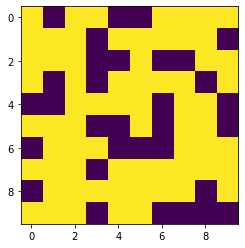

In [24]:
plt.imshow(mask.reshape(10,10))
